In [1]:
import pandas as pd

# Load the CSV file
data_path = '/Users/magdalenabaran/semester_project_2/EL3.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe
data.head()


,time,battery,temperature,x,y,z,0_radar,1_radar,2_radar,3_radar,4_radar,5_radar,6_radar,7_radar,package_type,f_cnt,dr,snr,rssi
0,2024-02-13 11:39:59.709,3.02,14.12,458,-249,-1423,63,18,16,12,9,6,11,10,PackageType.CHANGE,229,1,8.8,-100
1,2024-02-13 11:53:30.483,3.04,15.25,216,-243,-1328,59,13,10,5,5,10,10,3,PackageType.CHANGE,231,1,11.8,-96
2,2024-02-13 12:07:58.041,3.04,16.00,179,-248,-1239,67,13,7,6,6,6,5,5,PackageType.CHANGE,232,1,13.0,-103
3,2024-02-13 12:17:58.606,3.04,16.00,170,-249,-1218,72,17,7,5,6,6,6,5,PackageType.HEART_BEAT,233,1,11.0,-95
4,2024-02-13 12:27:57.606,3.04,16.50,167,-251,-1211,72,17,7,5,6,6,6,5,PackageType.HEART_BEAT,233,1,11.0,-95


In [2]:
# Check for missing values and data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6032 entries, 0 to 6031
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          6032 non-null   object 
 1   battery       6032 non-null   float64
 2   temperature   6032 non-null   float64
 3   x             6032 non-null   int64  
 4   y             6032 non-null   int64  
 5   z             6032 non-null   int64  
 6   0_radar       6032 non-null   int64  
 7   1_radar       6032 non-null   int64  
 8   2_radar       6032 non-null   int64  
 9   3_radar       6032 non-null   int64  
 10  4_radar       6032 non-null   int64  
 11  5_radar       6032 non-null   int64  
 12  6_radar       6032 non-null   int64  
 13  7_radar       6032 non-null   int64  
 14  package_type  6032 non-null   object 
 15  f_cnt         6032 non-null   int64  
 16  dr            6032 non-null   int64  
 17  snr           6032 non-null   float64
 18  rssi          6032 non-null 

In [3]:
# Check for missing values and data types for relevant columns
data[['time', 'x', 'y', 'z', 'package_type']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6032 entries, 0 to 6031
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   time          6032 non-null   object
 1   x             6032 non-null   int64 
 2   y             6032 non-null   int64 
 3   z             6032 non-null   int64 
 4   package_type  6032 non-null   object
dtypes: int64(3), object(2)
memory usage: 235.8+ KB


In [4]:
# Convert 'time' to datetime
data['time'] = pd.to_datetime(data['time'])

# Encode 'package_type' to numeric values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['package_type'] = encoder.fit_transform(data['package_type'])

# Display the first few rows to confirm changes
data.head()


,time,battery,temperature,x,y,z,0_radar,1_radar,2_radar,3_radar,4_radar,5_radar,6_radar,7_radar,package_type,f_cnt,dr,snr,rssi
0,2024-02-13 11:39:59.709,3.02,14.12,458,-249,-1423,63,18,16,12,9,6,11,10,0,229,1,8.8,-100
1,2024-02-13 11:53:30.483,3.04,15.25,216,-243,-1328,59,13,10,5,5,10,10,3,0,231,1,11.8,-96
2,2024-02-13 12:07:58.041,3.04,16.00,179,-248,-1239,67,13,7,6,6,6,5,5,0,232,1,13.0,-103
3,2024-02-13 12:17:58.606,3.04,16.00,170,-249,-1218,72,17,7,5,6,6,6,5,1,233,1,11.0,-95
4,2024-02-13 12:27:57.606,3.04,16.50,167,-251,-1211,72,17,7,5,6,6,6,5,1,233,1,11.0,-95


In [5]:
data['time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6032 entries, 0 to 6031
Series name: time
Non-Null Count  Dtype         
--------------  -----         
6032 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 47.3 KB


In [6]:
from sklearn.preprocessing import StandardScaler

# Normalize the magnetic field data
scaler = StandardScaler()
data[['x', 'y', 'z']] = scaler.fit_transform(data[['x', 'y', 'z']])

# Display normalized data
data.head()


,time,battery,temperature,x,y,z,0_radar,1_radar,2_radar,3_radar,4_radar,5_radar,6_radar,7_radar,package_type,f_cnt,dr,snr,rssi
0,2024-02-13 11:39:59.709,3.02,14.12,0.151115,-1.675761,0.342378,63,18,16,12,9,6,11,10,0,229,1,8.8,-100
1,2024-02-13 11:53:30.483,3.04,15.25,-1.737330,-1.610227,0.712328,59,13,10,5,5,10,10,3,0,231,1,11.8,-96
2,2024-02-13 12:07:58.041,3.04,16.00,-2.026059,-1.664839,1.058913,67,13,7,6,6,6,5,5,0,232,1,13.0,-103
3,2024-02-13 12:17:58.606,3.04,16.00,-2.096290,-1.675761,1.140691,72,17,7,5,6,6,6,5,1,233,1,11.0,-95
4,2024-02-13 12:27:57.606,3.04,16.50,-2.119701,-1.697606,1.167951,72,17,7,5,6,6,6,5,1,233,1,11.0,-95


In [7]:
import numpy as np

def create_sequences(data, sequence_length=3):
    xs = []
    ys = []
    # Iterate through the data to create sequences
    for i in range(len(data) - sequence_length):
        x = data[['x', 'y', 'z']].iloc[i:(i + sequence_length)].values
        # Include time difference in seconds as an additional feature
        time_diff = data['time'].iloc[(i + 1):(i + sequence_length + 1)].diff().dt.total_seconds().fillna(0).values.reshape(-1, 1)
        x = np.hstack((x, time_diff))
        y = data['package_type'].iloc[i + sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Create sequences
sequence_length = 3  # This is an arbitrary length, which you might need to tune
X, y = create_sequences(data, sequence_length)

# Show an example of the data shape
X.shape, y.shape


((6029, 3, 4), (6029,))

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/30


/Users/magdalenabaran/anaconda3/envs/bdsm/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


136/136 - 4s - 30ms/step - accuracy: 0.9336 - loss: 0.2381 - val_accuracy: 0.9524 - val_loss: 0.1603
Epoch 2/30
136/136 - 1s - 4ms/step - accuracy: 0.9594 - loss: 0.1459 - val_accuracy: 0.9565 - val_loss: 0.1498
Epoch 3/30
136/136 - 1s - 5ms/step - accuracy: 0.9613 - loss: 0.1366 - val_accuracy: 0.9689 - val_loss: 0.1329
Epoch 4/30
136/136 - 1s - 4ms/step - accuracy: 0.9643 - loss: 0.1318 - val_accuracy: 0.9607 - val_loss: 0.1324
Epoch 5/30
136/136 - 1s - 4ms/step - accuracy: 0.9645 - loss: 0.1273 - val_accuracy: 0.9710 - val_loss: 0.1336
Epoch 6/30
136/136 - 1s - 4ms/step - accuracy: 0.9664 - loss: 0.1257 - val_accuracy: 0.9689 - val_loss: 0.1305
Epoch 7/30
136/136 - 1s - 4ms/step - accuracy: 0.9664 - loss: 0.1237 - val_accuracy: 0.9710 - val_loss: 0.1278
Epoch 8/30
136/136 - 1s - 4ms/step - accuracy: 0.9659 - loss: 0.1222 - val_accuracy: 0.9731 - val_loss: 0.1252
Epoch 9/30
136/136 - 1s - 4ms/step - accuracy: 0.9650 - loss: 0.1228 - val_accuracy: 0.9710 - val_loss: 0.1261
Epoch 10/30

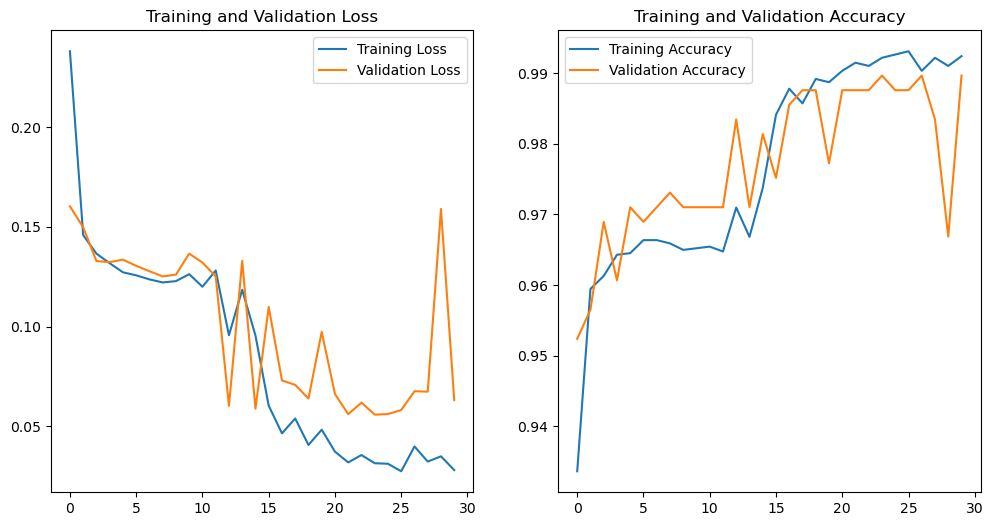

In [9]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.show()

plot_history(history)


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


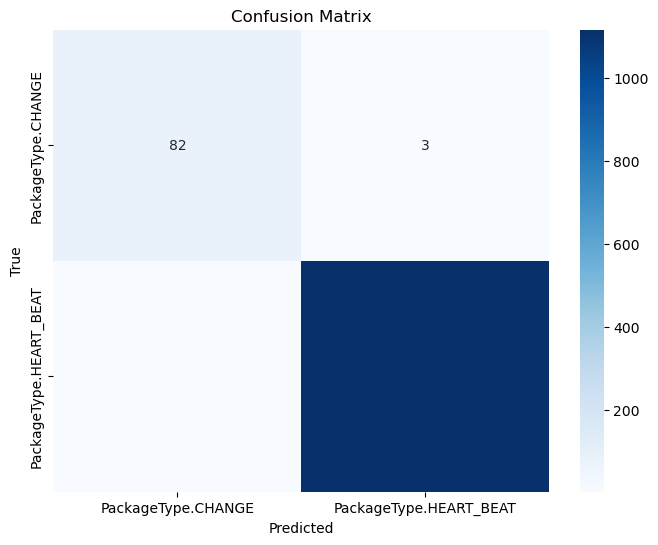

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_classes, target_names=encoder.classes_))


                        precision    recall  f1-score   support

    PackageType.CHANGE       0.95      0.96      0.96        85
PackageType.HEART_BEAT       1.00      1.00      1.00      1121

              accuracy                           0.99      1206
             macro avg       0.98      0.98      0.98      1206
          weighted avg       0.99      0.99      0.99      1206



In [12]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming y_pred_classes contains your model predictions as class indices
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Convert the confusion matrix into a DataFrame for better formatting
cm_df = pd.DataFrame(cm, index=encoder.classes_, columns=encoder.classes_)

# Display the confusion matrix as a table
print(cm_df)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                        PackageType.CHANGE  PackageType.HEART_BEAT
PackageType.CHANGE                      82                       3
PackageType.HEART_BEAT                   4                    1117


In [13]:
model.save('/Users/magdalenabaran/semester_project_2/model2.keras')  # Saves the model in the recommended format


In [14]:
from joblib import dump

# Assuming 'scaler' is your StandardScaler instance
dump(scaler, '/Users/magdalenabaran/semester_project_2/scaler2.joblib')
dump(encoder, '/Users/magdalenabaran/semester_project_2/encoder2.joblib')


['/Users/magdalenabaran/semester_project_2/encoder2.joblib']

In [15]:
from tensorflow.keras.models import load_model
from joblib import load
import datetime

In [16]:
model = load_model('/Users/magdalenabaran/semester_project_2/model2.keras')
scaler = load('/Users/magdalenabaran/semester_project_2/scaler2.joblib')
encoder = load('/Users/magdalenabaran/semester_project_2/encoder2.joblib')  # Assuming you saved the encoder too
# Define feature names for StandardScaler
feature_names = ['x', 'y', 'z']

def predict_package_type_from_api(df):
    # Preprocess the input data
    inputs_scaled = scaler.transform(df[['x', 'y', 'z']])
    
    # Convert time to seconds
    df['time'] = pd.to_datetime(df['time'])
    df['time_diff'] = (df['time'] - df['time'].shift(1)).dt.total_seconds().fillna(0)
    
    # Combine scaled features and time difference
    input_features = np.hstack((inputs_scaled, df['time_diff'].values.reshape(-1, 1)))
    
    # Reshape input features for LSTM model
    input_features = np.reshape(input_features, (input_features.shape[0], 1, input_features.shape[1]))
    
    # Predict package type
    predictions = model.predict(input_features)
    
    # Decode the predicted labels
    predicted_classes = encoder.inverse_transform(np.argmax(predictions, axis=1))
    
    # Add predicted package type as a new column in the DataFrame
    df['predicted_package_type'] = predicted_classes
    
    return df

In [17]:
import requests
import json
import io
import base64
import pandas as pd
 
url = "https://data.sensade.com"
 
payload = json.dumps({
    "dev_eui": "0080E115003BEA91",
    "from": "2024-03-01",
    "to": "2024-03-08"
})
 
username = "mbaran23@student.aau.dk"
pwd = "LFIIq8OCZQRcZf2gIEsc5lKVF"
basic_auth = base64.b64encode(f"{username}:{pwd}".encode())
 
headers = {
    'Content-Type': 'application/json',
    'Authorization': f'Basic {basic_auth.decode("utf-8")}'
}
 
response = requests.request("GET", url, headers=headers, data=payload)
 
if response.status_code != 200:
    exit(13)
 
csv_data = response.text
df = pd.read_csv(io.StringIO(csv_data))


In [18]:
check = predict_package_type_from_api(df)
check

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


,time,battery,temperature,x,y,z,0_radar,1_radar,2_radar,3_radar,...,6_radar,7_radar,package_type,f_cnt,dr,snr,rssi,hw_fw_version,time_diff,predicted_package_type
0,2024-03-01 00:03:31.999,NaN,5.500,312,-465,-991,NaN,NaN,NaN,NaN,...,NaN,NaN,PackageType.HEART_BEAT,1510,5,1.8,-89,DataVersion.HW_2FW2_X_X,0.000,PackageType.CHANGE
1,2024-03-01 00:13:30.999,NaN,5.500,309,-463,-992,NaN,NaN,NaN,NaN,...,NaN,NaN,PackageType.HEART_BEAT,1510,5,1.8,-89,DataVersion.HW_2FW2_X_X,599.000,PackageType.HEART_BEAT
2,2024-03-01 00:23:31.999,3.16,5.375,312,-466,-987,4.0,5.0,6.0,6.0,...,6.0,5.0,PackageType.HEART_BEAT,1510,5,1.8,-89,DataVersion.HW_2FW2_X_X,601.000,PackageType.HEART_BEAT
3,2024-03-01 00:33:33.017,NaN,5.375,312,-464,-997,NaN,NaN,NaN,NaN,...,NaN,NaN,PackageType.HEART_BEAT,1511,5,1.2,-89,DataVersion.HW_2FW2_X_X,601.018,PackageType.HEART_BEAT
4,2024-03-01 00:43:33.017,NaN,5.375,310,-467,-993,NaN,NaN,NaN,NaN,...,NaN,NaN,PackageType.HEART_BEAT,1511,5,1.2,-89,DataVersion.HW_2FW2_X_X,600.000,PackageType.HEART_BEAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,2024-03-07 23:11:03.635,NaN,0.375,381,-476,-1080,NaN,NaN,NaN,NaN,...,NaN,NaN,PackageType.HEART_BEAT,1874,5,-2.2,-92,DataVersion.HW_2FW2_X_X,601.068,PackageType.HEART_BEAT
770,2024-03-07 23:21:04.635,NaN,0.625,377,-473,-1074,NaN,NaN,NaN,NaN,...,NaN,NaN,PackageType.HEART_BEAT,1874,5,-2.2,-92,DataVersion.HW_2FW2_X_X,601.000,PackageType.HEART_BEAT
771,2024-03-07 23:31:04.635,3.16,0.875,374,-476,-1072,5.0,5.0,5.0,5.0,...,5.0,5.0,PackageType.HEART_BEAT,1874,5,-2.2,-92,DataVersion.HW_2FW2_X_X,600.000,PackageType.HEART_BEAT
772,2024-03-07 23:41:04.589,NaN,1.000,375,-475,-1073,NaN,NaN,NaN,NaN,...,NaN,NaN,PackageType.HEART_BEAT,1875,5,1.2,-90,DataVersion.HW_2FW2_X_X,599.954,PackageType.HEART_BEAT


In [19]:
df.shape

(774, 22)

In [20]:
df.predicted_package_type.value_counts()

predicted_package_type
PackageType.HEART_BEAT    763
PackageType.CHANGE         11
Name: count, dtype: int64

In [21]:
count_same_values = len(df[df['package_type'] == df['predicted_package_type']])
print("Number of rows with same values in 'package_type' and 'predicted_package_type':", count_same_values)

Number of rows with same values in 'package_type' and 'predicted_package_type': 755


In [22]:
check.to_csv('/Users/magdalenabaran/semester_project_2/check.csv', index=False)